# Analysis of Experiment

## Introduction to Cryptography

### CS 411

In [1]:
import json
from unidecode import unidecode
import string
import pandas as pd

### With Advance Organiser

#### Correct Answers for quizes

In [2]:
pex_answers_with_adv = ['fkdw', 'merci', '8', 'kzzovob', 'catharsis', 'dmbnczfd', '11', 'decrypter']
grp_act_answers = ["7", "maitre corbeau sur un arbre perche tenait en son bec un fromage"]
final_quiz_answers = ["gtnx", "oseille", "22"]

#### Student Gender Map

We create a dictionary `gender_map_with_adv` to read and store the mapping between names and gender.

In [3]:
gender_map_with_adv = {}
with open("./data/with_adv_org/gender.json", encoding="utf-8") as gend_file:
    gender_map_with_adv = json.load(gend_file)
gender_map_with_adv = {k.lower():v for k,v in gender_map_with_adv.items()}

#### Intialising students

We shall store the information about students in dictionary of dictionary `(students_with_adv)`, with first level key as the unique id and the second level key as name, gender, prac_ex_score (denoting the score in the practice session), group id, final_quiz_score, final_quiz_time.

In [4]:
students_with_adv = {}

with open("./data/with_adv_org/ac/1-bienvenue__p1__ac-quiz-elc3/product.json", encoding="utf-8") as pinfo_file:
    pinfo_with_adv = json.load(pinfo_file)
    
    for unid in pinfo_with_adv["activityData"]["payload"]:
        if unid == "KbPXJK9KfSWierSau" or unid == "g5LWw7gt2qZ5a8mLr":
            # the first id belongs to Maxime and second id to a unlisted user
            continue 
            
        students_with_adv[unid] = {}
        sname = pinfo_with_adv["activityData"]["payload"][unid]["data"]["form"]["0"]["text"].strip().lower()
        
        students_with_adv[unid]["name"] = sname
        students_with_adv[unid]["gender"] = gender_map_with_adv[sname]

#### Advance organiser Scoring

In [5]:
with open("./data/with_adv_org/ac/2-encodagedécodage-ave__p1__ac-quiz-fn6u/product.json") as adv_file:
    adv_quiz = json.load(adv_file)

    for unid in adv_quiz["activityData"]["payload"]:
        if unid == "KbPXJK9KfSWierSau" or unid == "g5LWw7gt2qZ5a8mLr":
            continue
            
        students_with_adv[unid]["adv_org_score"] = adv_quiz["activityData"]["payload"][unid]["data"]["correctCount"]

#### Practise session Scoring

In [6]:
with open("./data/with_adv_org/ac/5-exercices-code-de-cé__p1__ac-quiz-c78m/product.json", encoding="utf-8") as prac_file:
    prac_quiz_with_adv = json.load(prac_file)

    for unid in prac_quiz_with_adv["activityData"]["payload"]:
        if unid == "KbPXJK9KfSWierSau" or unid == "g5LWw7gt2qZ5a8mLr":
            continue
        score = 0
        for qid in range(8):
            ans = prac_quiz_with_adv["activityData"]["payload"][unid]["data"]["form"][str(qid)]["text"].strip().lower()
            if ans == "":
                try:
                    ans = prac_quiz_with_adv["activityData"]["payload"][unid]["data"]["form"][str(qid)]["value"]
                except:
                    ans = ""
            if ans == pex_answers_with_adv[qid]:
                score += 1
        students_with_adv[unid]["prac_ex_score"] = score

#### Group activity scoring

In [7]:
# obtaining the group id for each student
with open("./data/with_adv_org/ac/7-chat__p2__ac-chat-h93z/object.json", encoding="utf-8") as group_file:
    groups_with_adv = json.load(group_file)

    for gid in groups_with_adv["socialStructure"]["group"]:
        for unid in groups_with_adv["socialStructure"]["group"][gid]:
            if unid == "KbPXJK9KfSWierSau" or unid == "g5LWw7gt2qZ5a8mLr":
                continue
            students_with_adv[unid]["group_id"] = gid

In [8]:
with open("./data/with_adv_org/ac/7-exercice-attaque__p2__ac-quiz-eopy/product.json", encoding="utf-8") as grp_file:
    grp_quiz_with_adv = json.load(grp_file)

    for gid in grp_quiz_with_adv["activityData"]["payload"]:
        score = 0
        for qid in range(2):
            temp_ans = unidecode(grp_quiz_with_adv["activityData"]["payload"][gid]["data"]["form"][str(qid)]["text"].strip().lower())
            ans = temp_ans.translate(str.maketrans('', '', string.punctuation))
            if ans == "":
                try:
                    ans = grp_quiz_with_adv["activityData"]["payload"][gid]["data"]["form"][str(qid)]["value"]
                except:
                    ans = ""
            if ans == grp_act_answers[qid]:
                score += 1
        for unid in students_with_adv:
            if students_with_adv[unid]["group_id"] == gid:
                students_with_adv[unid]["grp_ex_score"] = score

#### Final Quiz Scoring

In [9]:
with open("./data/with_adv_org/ac/8-quiz-final__p1__ac-quiz-8ayr/product.json", encoding="utf-8") as fquiz_file:
    final_quiz_with_adv = json.load(fquiz_file)
    final_with_adv_quiz_id = final_quiz_with_adv["_id"]

    for unid in final_quiz_with_adv["activityData"]["payload"]:
        if unid == "KbPXJK9KfSWierSau" or unid == "g5LWw7gt2qZ5a8mLr":
            continue
        score = 0
        for qid in range(3):
            ans = final_quiz_with_adv["activityData"]["payload"][unid]["data"]["form"][str(qid)]["text"].strip().lower()
            if ans == "":
                try:
                    ans = final_quiz_with_adv["activityData"]["payload"][unid]["data"]["form"][str(qid)]["value"]
                except:
                    ans = ""
            if ans == final_quiz_answers[qid]:
                score += 1
        students_with_adv[unid]["final_quiz_score"] = score

#### Final quiz Timing

In [10]:
log_file_with_adv = pd.read_csv("./data/with_adv_org/log.tsv", sep="\t", encoding="utf-8", usecols=["timestamp", "instanceId", "activityId", "activityTitle", "type", ])
final_quiz_log_with_adv = log_file_with_adv.loc[log_file_with_adv['activityId'] == final_with_adv_quiz_id]
datetime_with_adv = pd.to_datetime(final_quiz_log_with_adv["timestamp"], infer_datetime_format=True)
final_quiz_log_with_adv["timestamp"] = datetime_with_adv

<ipython-input-10-6cd641140044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_quiz_log_with_adv["timestamp"] = datetime_with_adv


In [11]:
student_wise_with_adv = final_quiz_log_with_adv.groupby(["instanceId"])
for gid, group in student_wise_with_adv:
    start_with_adv = group.loc[group['type'] == "activityDidMount", 'timestamp'].iloc[0]
    stop_with_adv = group.loc[group['type'] == "coordinates", 'timestamp'].iloc[0]
    time_taken_with_adv = pd.Timedelta(stop_with_adv - start_with_adv).seconds
    students_with_adv[gid]["fina_quiz_time(sec)"] = time_taken_with_adv

### Without Advance Organiser

#### Correct Answers for quizes

In [12]:
pex_answers_wo_adv = ['fkdw', 'merci', '8', 'kzzovob', 'catharsis', 'dmbnczfd', '11', 'decrypter', "tulipe", "kvybcubar", "16"]
grp_act_answers = ["7", "maitre corbeau sur un arbre perche tenait en son bec un fromage"]
final_quiz_answers = ["gtnx", "oseille", "22"]

#### Student Gender Map

In [13]:
gender_map_wo_adv = {}
with open("./data/without_adv_org/gender.json", encoding="utf-8") as gend_file:
    gender_map_wo_adv = json.load(gend_file)

#### Intialising students

In [14]:
students_wo_adv = {}
with open("./data/without_adv_org/ac/1-bienvenue__p1__ac-quiz-0dbj/product.json", encoding="utf-8") as pinfo_file:
    pinfo_wo_adv = json.load(pinfo_file)
    
    for unid in pinfo_wo_adv["payload"]:   
        students_wo_adv[unid] = {}
        sname = pinfo_wo_adv["payload"][unid]["data"]["form"]["0"]["text"].strip()
        students_wo_adv[unid]["name"] = unidecode(sname)
        students_wo_adv[unid]["gender"] = gender_map_wo_adv[sname]

#### Practise session Scoring

In [15]:
with open("./data/without_adv_org/ac/4-exercices-code-de-cé__p1__ac-quiz-6zqr/product.json", encoding="utf-8") as prac_file:
    prac_quiz_wo_adv = json.load(prac_file)

    for unid in prac_quiz_wo_adv["payload"]:
        score = 0
        for qid in range(11):
            ans = prac_quiz_wo_adv["payload"][unid]["data"]["form"][str(qid)]["text"].strip().lower()
            if ans == "":
                try:
                    ans = prac_quiz_wo_adv["payload"][unid]["data"]["form"][str(qid)]["value"]
                except:
                    ans = ""
            if ans == pex_answers_wo_adv[qid]:
                score += 1
        students_wo_adv[unid]["prac_ex_score"] = score

#### Group activity scoring

In [16]:
group_activity_wo_adv = {}
with open("./data/without_adv_org/ac/6-chat__p2__ac-chat-hhix/object.json", encoding="utf-8") as chat_file:
    chat_wo_adv = json.load(chat_file)

    for gid in chat_wo_adv["socialStructure"]["group"]:
        if gid not in group_activity_wo_adv:
            group_activity_wo_adv[gid] = {}
        for unid in chat_wo_adv["socialStructure"]["group"][gid]:
            students_wo_adv[unid]["group_id"] = gid

In [17]:
with open("./data/without_adv_org/ac/6-exercice-attaque__p2__ac-quiz-bcch/product.json", encoding="utf-8") as grp_file:
    grp_quiz_wo_adv = json.load(grp_file)

    for gid in grp_quiz_wo_adv["payload"]:
        score = 0
        for qid in range(2):
            temp_ans = unidecode(grp_quiz_wo_adv["payload"][gid]["data"]["form"][str(qid)]["text"].lower())
            ans = temp_ans.translate(str.maketrans('', '', string.punctuation))
            if ans == "":
                try:
                    ans = grp_quiz_wo_adv["payload"][gid]["data"]["form"][str(qid)]["value"]
                except:
                    ans = ""
            if ans == grp_act_answers[qid]:
                score += 1
        for unid in students_wo_adv:
            if students_wo_adv[unid]["group_id"] == gid:
                students_wo_adv[unid]["grp_ex_score"] = score

#### Final Quiz Scoring

In [18]:
with open("./data/without_adv_org/ac/7-quiz-final__p1__ac-quiz-azie/product.json", encoding="utf-8") as fquiz_file:
    final_quiz_wo_adv = json.load(fquiz_file)
    final_wo_adv_quiz_id = "cki4fc7ai00vc01ywdqxtazie"

    for unid in final_quiz_wo_adv["payload"]:
        score = 0
        for qid in range(3):
            ans = final_quiz_wo_adv["payload"][unid]["data"]["form"][str(qid)]["text"].lower()
            if ans == "":
                try:
                    ans = final_quiz_wo_adv["payload"][unid]["data"]["form"][str(qid)]["value"]
                except:
                    ans = ""
            if ans == final_quiz_answers[qid]:
                score += 1
        students_wo_adv[unid]["final_quiz_score"] = score

#### Final quiz Timing

In [19]:
log_file_wo_adv = pd.read_csv("./data/without_adv_org/log.tsv", sep="\t", encoding="utf-8", usecols=["timestamp", "instanceId", "activityId", "activityTitle", "type", ])
final_quiz_log_wo_adv = log_file_wo_adv.loc[log_file_wo_adv['activityId'] == final_wo_adv_quiz_id]
datetime = pd.to_datetime(final_quiz_log_wo_adv["timestamp"], infer_datetime_format=True)
final_quiz_log_wo_adv["timestamp"] = datetime

<ipython-input-19-d26eeeefa863>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_quiz_log_wo_adv["timestamp"] = datetime


In [20]:
student_wise_wo_adv = final_quiz_log_wo_adv.groupby(["instanceId"])
for gid, group_wo_adv in student_wise_wo_adv:
    # the first row indicates the start of the quiz
    start_wo_adv = group_wo_adv.iloc[[0]]['timestamp'].iloc[0]
    # the last row indicates the end of the quiz
    stop_wo_adv = group_wo_adv.iloc[[-1]]['timestamp'].iloc[0]
    time_taken_wo_adv = pd.Timedelta(stop_wo_adv - start_wo_adv).seconds
    students_wo_adv[gid]["fina_quiz_time(sec)"] = time_taken_wo_adv

In [21]:
print("The number of students with adv organiser", len(students_with_adv.keys()))
print("The number of students without adv organiser", len(students_wo_adv.keys()))

The number of students with adv organiser 24
The number of students without adv organiser 16


### Creating a dataframe

In [30]:
student_info = []
for sid in students_with_adv:
    std = students_with_adv[sid]
    temp_list = [sid, std["name"], std["gender"], "Yes",
                std["prac_ex_score"], std["group_id"],
                std["grp_ex_score"],
                std["final_quiz_score"], std["fina_quiz_time(sec)"]]
    student_info.append(temp_list)


for sid in students_wo_adv:
    std = students_wo_adv[sid]
    temp_list = [sid, std["name"], std["gender"], "No",
                std["prac_ex_score"], std["group_id"],
                std["grp_ex_score"],
                std["final_quiz_score"], std["fina_quiz_time(sec)"]]
    student_info.append(temp_list)

In [31]:
col_names = ["student_id", "student_name", "gender", "advance_org", "prac_ex_score", "group_id", "grp_ex_score", "final_quiz_score", "final_quiz_time(sec)"]
students_df = pd.DataFrame(student_info, columns =col_names)
students_df

,student_id,student_name,gender,advance_org,prac_ex_score,group_id,grp_ex_score,final_quiz_score,final_quiz_time(sec)
0,7dFrjWJgDe4CvuSY6,eve,F,Yes,7,4,2,3,112
1,82PbpSzvLk8AJ6Swo,xavier mettraux,M,Yes,8,6,2,3,105
2,8tWghFsBXWjLDt6F8,gloria,F,Yes,8,2,2,3,90
3,GYqE83BXBXQdcBZ8D,paul,M,Yes,7,5,1,3,139
4,KZrnFNem8eHZdmEKy,aïdan,M,Yes,7,1,2,3,100
5,MXL6EcEtzXxisGjnm,valentine,F,Yes,8,7,1,3,109
6,Rn3dZwXRGiNNSPz9a,louis revaz,M,Yes,4,1,2,2,134
7,SjBTogCj7pXPJM3sc,célia crelier,F,Yes,7,5,1,3,165
8,YW92Gfc5Bm6bvbQvS,romane,F,Yes,7,8,1,3,86
9,bDe5TRETuJMZfQpQJ,milan,M,Yes,7,7,1,3,137


In [32]:
students_df.to_csv("./student_score.csv")

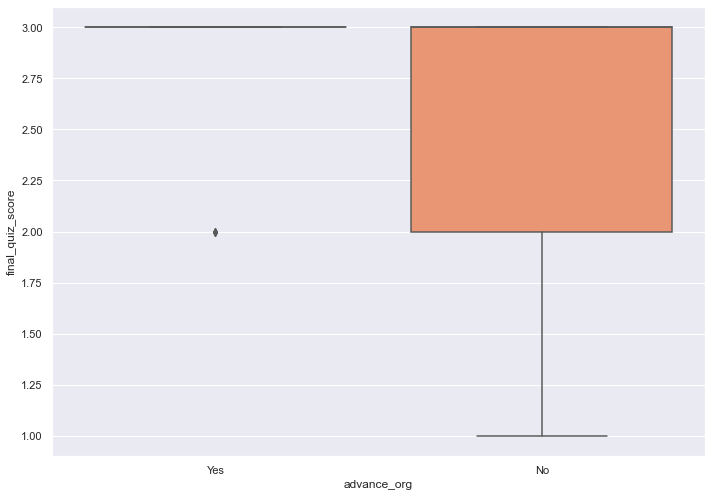

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="advance_org", y="final_quiz_score", data=students_df, palette="Set2")

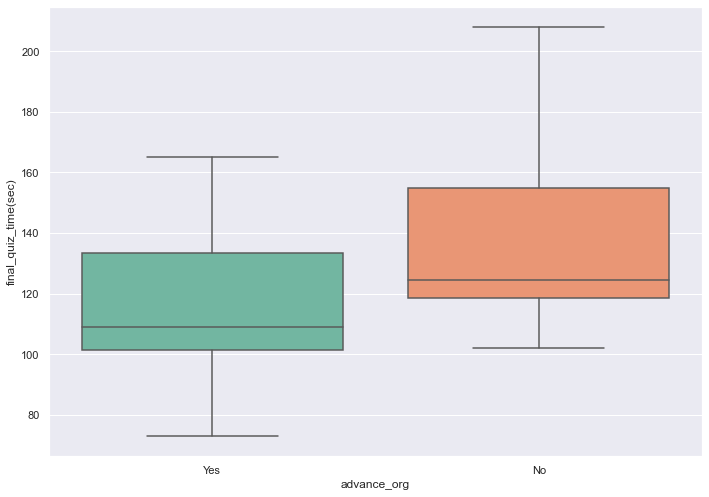

In [53]:
ax = sns.boxplot(x="advance_org", y="final_quiz_time(sec)", data=students_df, palette="Set2")

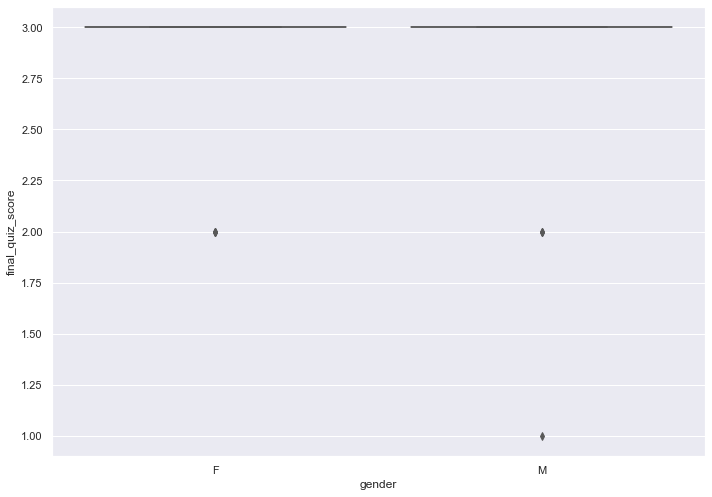

In [55]:
ax = sns.boxplot(x="gender", y="final_quiz_score", data=students_df, palette="Set2")

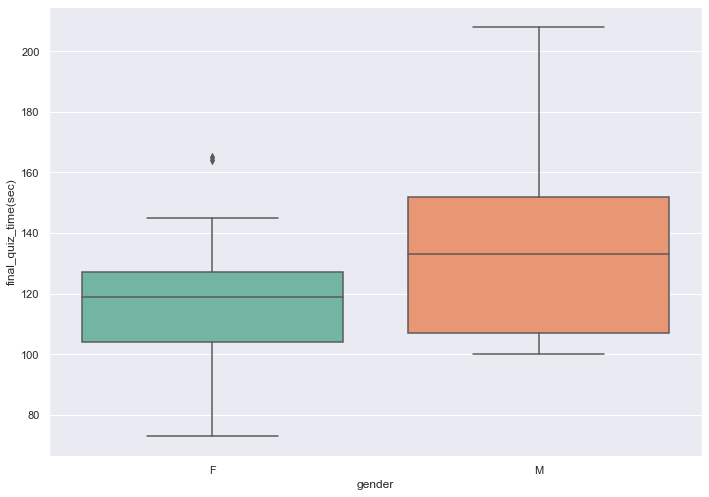

In [54]:
ax = sns.boxplot(x="gender", y="final_quiz_time(sec)", data=students_df, palette="Set2")